In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import silhouette_score

%matplotlib inline

from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # simple TT split cv
import numpy as np
import seaborn as sb

from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score

from sklearn.compose import make_column_transformer

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

# make sure you have these to make dendrograms!-------
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
#-----------------------------------------------------

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Upload Data
file = '/StudentsPerformance - StudentsPerformance.csv'
df = pd.read_csv(file)
df.head()


,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#read in our student data set
file_path = '/content/StudentsPerformance - StudentsPerformance.csv'
student_data = pd.read_csv(file_path)

#drop any missing indicies and reset
student_data.isnull().sum()
student_data.dropna(inplace = True)
student_data.reset_index(inplace = True)

#print out our data set (more so to check that it imported correctly)
student_data.head()

,index,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [ ]:
#QUESTION #1: writing score linear regression model

# set up X and y
predictors = ["gender","race", "parental_level_of_education", "lunch", "test_preparation_course", "math_score", "reading_score"]
contin = ["math_score", "reading_score"]
categorical_variables = ["gender","race", "parental_level_of_education", "lunch", "test_preparation_course"]
X = student_data[predictors]
y = student_data["writing score"]

# z score and make dummys
z = make_column_transformer((StandardScaler(), contin),
 (OneHotEncoder(), categorical_variables),
    remainder = "passthrough")

lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

#Linear model
pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# calculations
print("train variables")
print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MAE : ", mean_absolute_error(y_train,y_pred_train))
print("MAPE: ", mean_squared_error(y_train,y_pred_train))
print("R2  : ", r2_score(y_train,y_pred_train))
print("test variables")
print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("MAE : ", mean_absolute_error(y_test,y_pred_test))
print("MAPE: ", mean_squared_error(y_test,y_pred_test))
print("R2  : ", r2_score(y_test,y_pred_test))

train variables
MSE :  11.861137388794505
MAE :  2.8090421876199128
MAPE:  11.861137388794505
R2  :  0.9484994247933276
test variables
MSE :  12.753534530905334
MAE :  2.8008539433823256
MAPE:  12.753534530905334
R2  :  0.9443657974101917


In [ ]:
#QUESTION #1: reading score linear regression model

# set up X and y
predictors = ["gender","race", "parental_level_of_education", "lunch", "test_preparation_course", "math_score", "writing score"]
contin = ["math_score", "writing score"]
categorical_variables = ["gender","race", "parental_level_of_education", "lunch", "test_preparation_course"]
X2 = student_data[predictors]
y2 = student_data["reading_score"]

# z score and make dummys
z = make_column_transformer((StandardScaler(), contin),
 (OneHotEncoder(), categorical_variables),
    remainder = "passthrough")

lr = LinearRegression()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2)

#Linear model
pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

# fit
pipe.fit(X_train2,y_train2)

# predict
y_pred_train2 = pipe.predict(X_train2)
y_pred_test2 = pipe.predict(X_test2)

# calculations
print("train variables")
print("MSE : ", mean_squared_error(y_train2,y_pred_train2))
print("MAE : ", mean_absolute_error(y_train2,y_pred_train2))
print("MAPE: ", mean_squared_error(y_train2,y_pred_train2))
print("R2  : ", r2_score(y_train2,y_pred_train2))
print("test variables")
print("MSE : ", mean_squared_error(y_test2,y_pred_test2))
print("MAE : ", mean_absolute_error(y_test2,y_pred_test2))
print("MAPE: ", mean_squared_error(y_test2,y_pred_test2))
print("R2  : ", r2_score(y_test2,y_pred_test2))

train variables
MSE :  15.343092322679931
MAE :  3.1859234117742767
MAPE:  15.343092322679931
R2  :  0.9283846605903298
test variables
MSE :  17.241830352816887
MAE :  3.2918062619221895
MAPE:  17.241830352816887
R2  :  0.9163502686110081


In [ ]:
#QUESTION #1: math score linear regression model

# set up X and y
predictors = ["gender","race", "parental_level_of_education", "lunch", "test_preparation_course", "reading_score", "writing score"]
contin = ["reading_score", "writing score"]
categorical_variables = ["gender","race", "parental_level_of_education", "lunch", "test_preparation_course"]
X3 = student_data[predictors]
y3 = student_data["math_score"]

# z score and make dummys
z = make_column_transformer((StandardScaler(), contin),
 (OneHotEncoder(), categorical_variables),
    remainder = "passthrough")

lr = LinearRegression()

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3, test_size = 0.2)

#Linear model
pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

# fit
pipe.fit(X_train3,y_train3)

# predict
y_pred_train3 = pipe.predict(X_train3)
y_pred_test3 = pipe.predict(X_test3)

# calculations
print("train variables")
print("MSE : ", mean_squared_error(y_train3,y_pred_train3))
print("MAE : ", mean_absolute_error(y_train3,y_pred_train3))
print("MAPE: ", mean_squared_error(y_train3,y_pred_train3))
print("R2  : ", r2_score(y_train3,y_pred_train3))
print("test variables")
print("MSE : ", mean_squared_error(y_test3,y_pred_test3))
print("MAE : ", mean_absolute_error(y_test3,y_pred_test3))
print("MAPE: ", mean_squared_error(y_test3,y_pred_test3))
print("R2  : ", r2_score(y_test3,y_pred_test3))

train variables
MSE :  27.949861960926327
MAE :  4.211345090843654
MAPE:  27.949861960926327
R2  :  0.877783686010631
test variables
MSE :  30.534799192113233
MAE :  4.390038401732449
MAPE:  30.534799192113233
R2  :  0.8691778632917323


In [ ]:
#QUESTION 1: creation new table with all the accurary values for the box plots

MSE_train = [(mean_squared_error(y_train,y_pred_train)), (mean_squared_error(y_train2,y_pred_train2)), (mean_squared_error(y_train3,y_pred_train3))]

MSE_test = [(mean_squared_error(y_test,y_pred_test)), (mean_squared_error(y_test2,y_pred_test2)), (mean_squared_error(y_test3,y_pred_test3))]

MAE_train = [(mean_absolute_error(y_train,y_pred_train)), (mean_absolute_error(y_train2,y_pred_train2)), (mean_absolute_error(y_train3,y_pred_train3))]

MAE_test = [(mean_absolute_error(y_test,y_pred_test)), (mean_absolute_error(y_test2,y_pred_test2)), (mean_absolute_error(y_test3,y_pred_test3))]

MAPE_train = [(mean_squared_error(y_train,y_pred_train)), (mean_squared_error(y_train2,y_pred_train2)), (mean_squared_error(y_train3,y_pred_train3))]

MAPE_test= [(mean_squared_error(y_test,y_pred_test)), (mean_squared_error(y_test2,y_pred_test2)), (mean_squared_error(y_test3,y_pred_test3))]

R2_train = [(r2_score(y_train,y_pred_train)), (r2_score(y_train2,y_pred_train2)), (r2_score(y_train3,y_pred_train3))]

R2_test = [(r2_score(y_test,y_pred_test)), (r2_score(y_test2,y_pred_test2)), (r2_score(y_test3,y_pred_test3))]

model_names = ["writing_model", "reading_model", "math_model"]

# Create a DataFrame
measures_df = pd.DataFrame({'Model': model_names, 'MSE_train': MSE_train, 'MSE_test': MSE_test, 'MAE_train': MAE_train, 'MAE_test': MAE_test, 'MAPE_train': MAPE_train, 'MAPE_test': MAPE_test, 'R2_train': R2_train, 'R2_test': R2_test})

# Create a data table
measures_df.head()



,Model,MSE_train,MSE_test,MAE_train,MAE_test,MAPE_train,MAPE_test,R2_train,R2_test
0,writing_model,11.861137,12.753535,2.809042,2.800854,11.861137,12.753535,0.948499,0.944366
1,reading_model,15.343092,17.241830,3.185923,3.291806,15.343092,17.241830,0.928385,0.916350
2,math_model,27.949862,30.534799,4.211345,4.390038,27.949862,30.534799,0.877784,0.869178


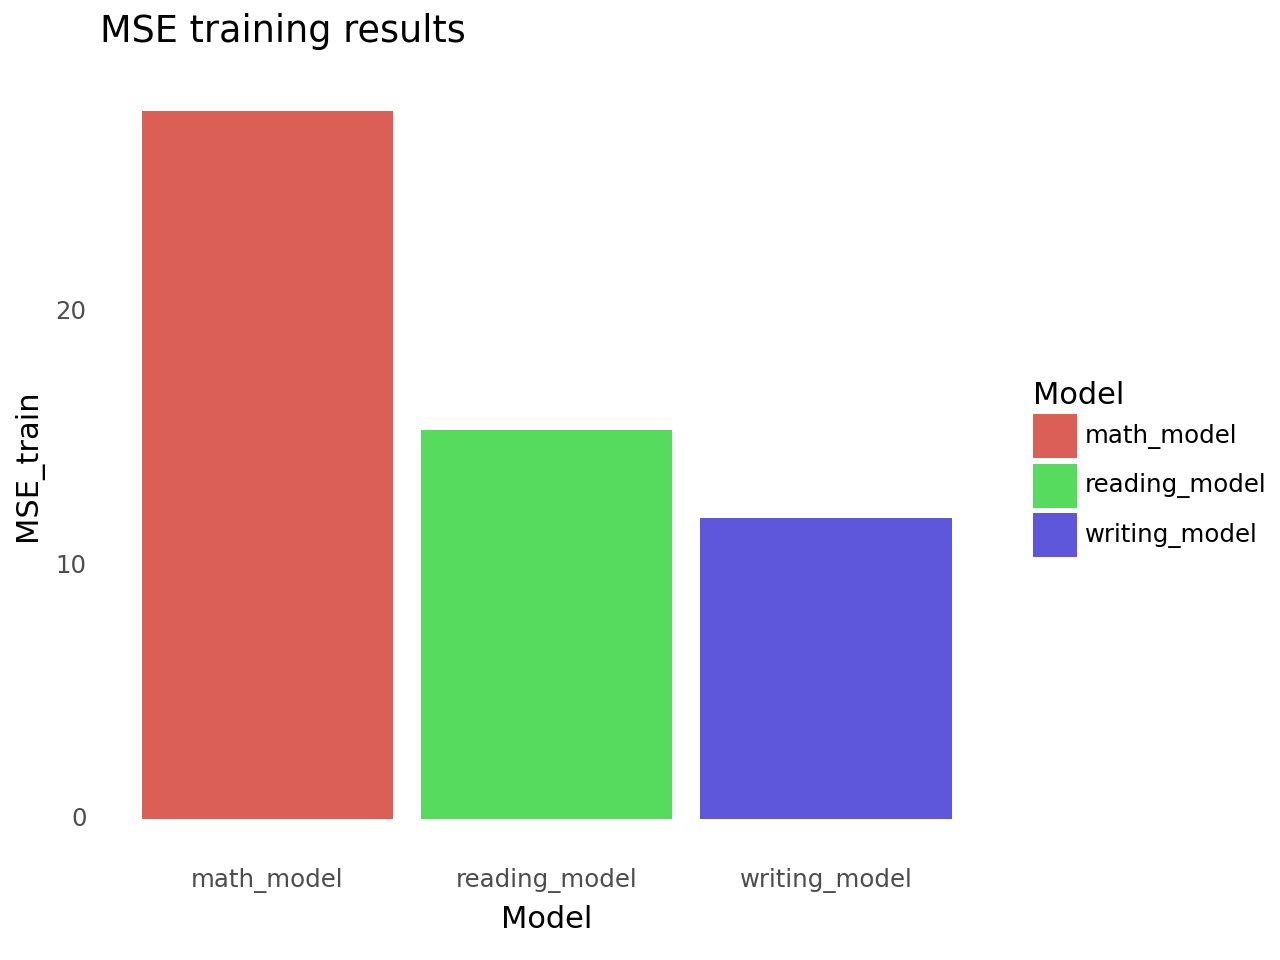

<Figure Size: (640 x 480)>

In [ ]:
#QUESTION 1: ggplot Bar Chart
(ggplot(measures_df, aes( x = "Model", y = "MSE_train", fill = "Model")) + labs(title = "MSE training results")
+ geom_bar(stat = "identity") + theme_minimal() + theme(panel_grid_major_x = element_blank(),
  panel_grid_major_y = element_blank(), panel_grid_minor_y = element_blank()))

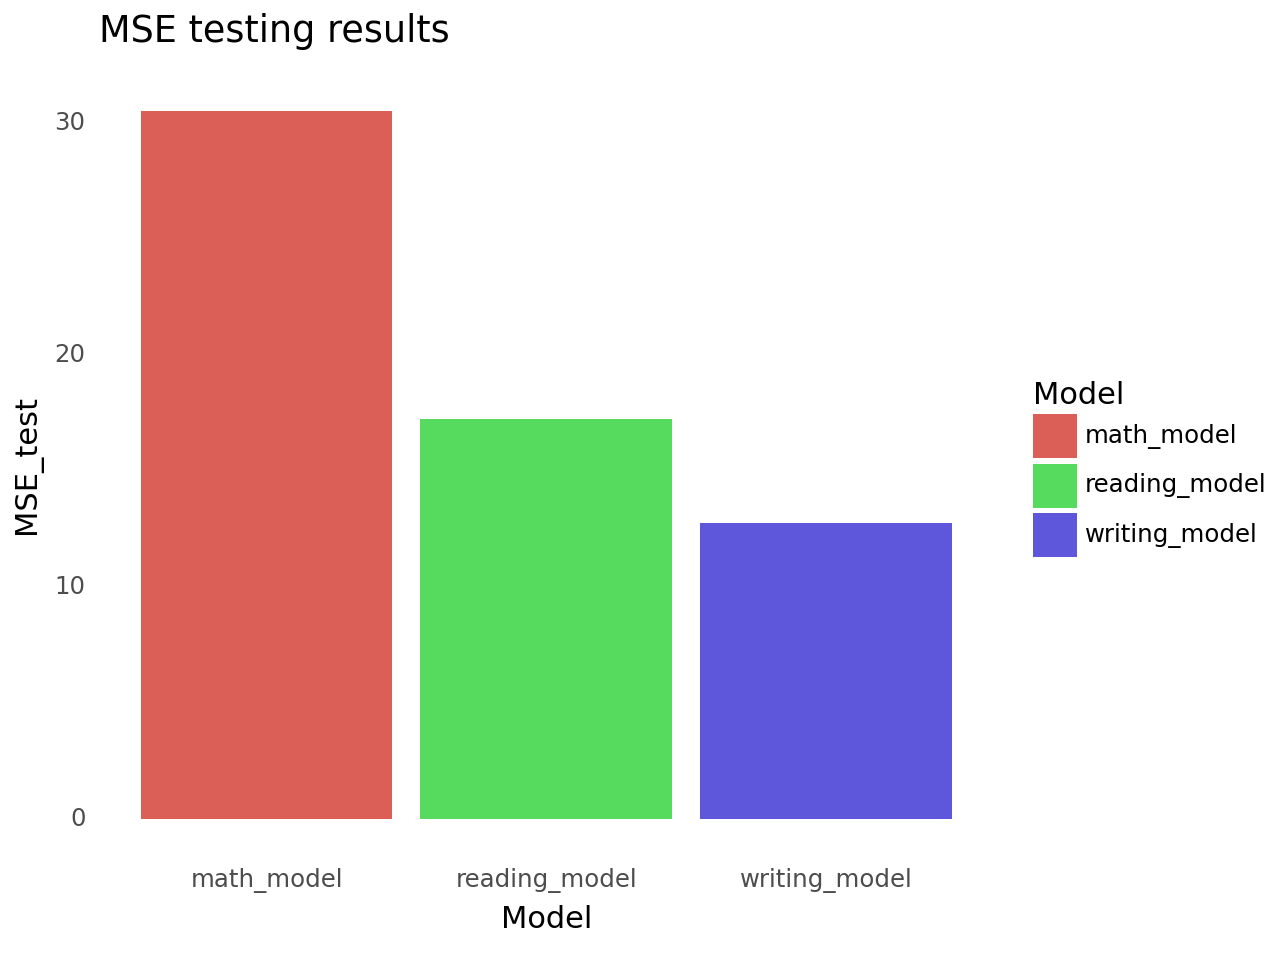

<Figure Size: (640 x 480)>

In [ ]:
#QUESTION 1: ggplot Bar Chart
(ggplot(measures_df, aes( x = "Model", y = "MSE_test", fill = "Model")) + labs(title = "MSE testing results")
+ geom_bar(stat = "identity") + theme_minimal() + theme(panel_grid_major_x = element_blank(),
  panel_grid_major_y = element_blank(), panel_grid_minor_y = element_blank()))

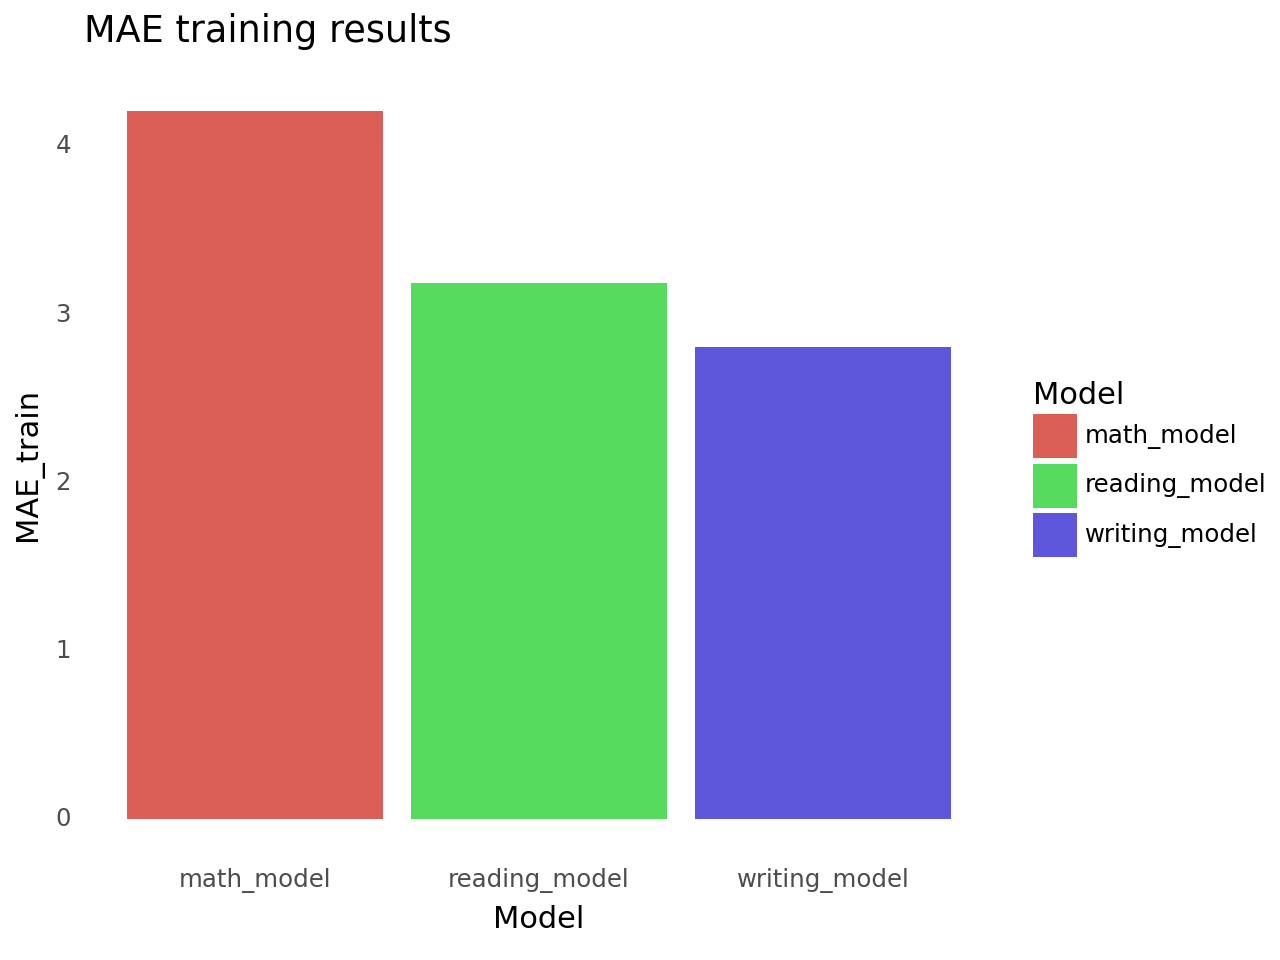

<Figure Size: (640 x 480)>

In [ ]:
#QUESTION 1: ggplot Bar Chart
(ggplot(measures_df, aes( x = "Model", y = "MAE_train", fill = "Model")) + labs(title = "MAE training results")
+ geom_bar(stat = "identity") + theme_minimal() + theme(panel_grid_major_x = element_blank(),
  panel_grid_major_y = element_blank(), panel_grid_minor_y = element_blank()))

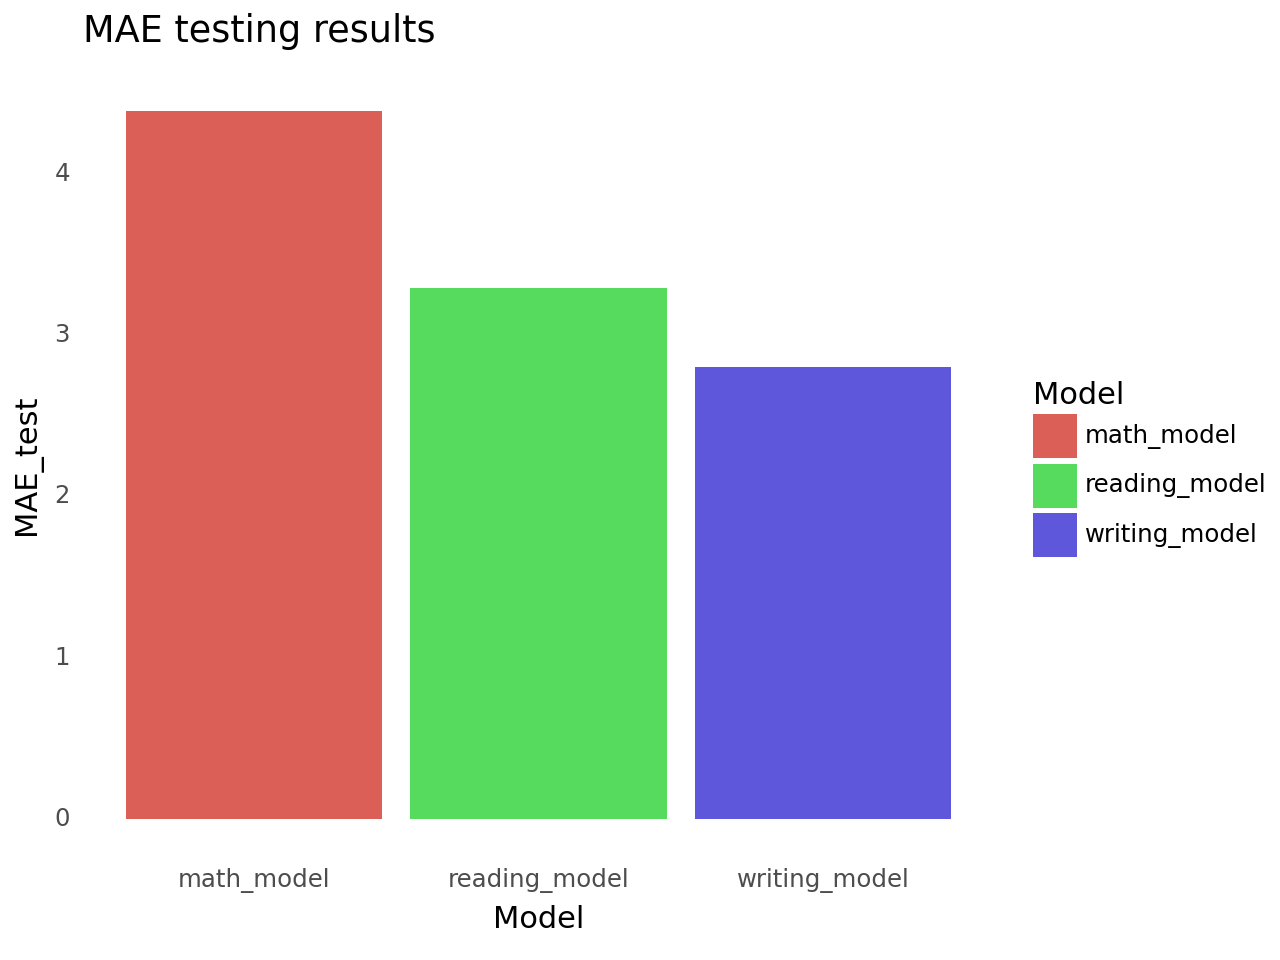

<Figure Size: (640 x 480)>

In [ ]:
#QUESTION 1: ggplot Bar Chart
(ggplot(measures_df, aes( x = "Model", y = "MAE_test", fill = "Model")) + labs(title = "MAE testing results")
+ geom_bar(stat = "identity") + theme_minimal() + theme(panel_grid_major_x = element_blank(),
  panel_grid_major_y = element_blank(), panel_grid_minor_y = element_blank()))

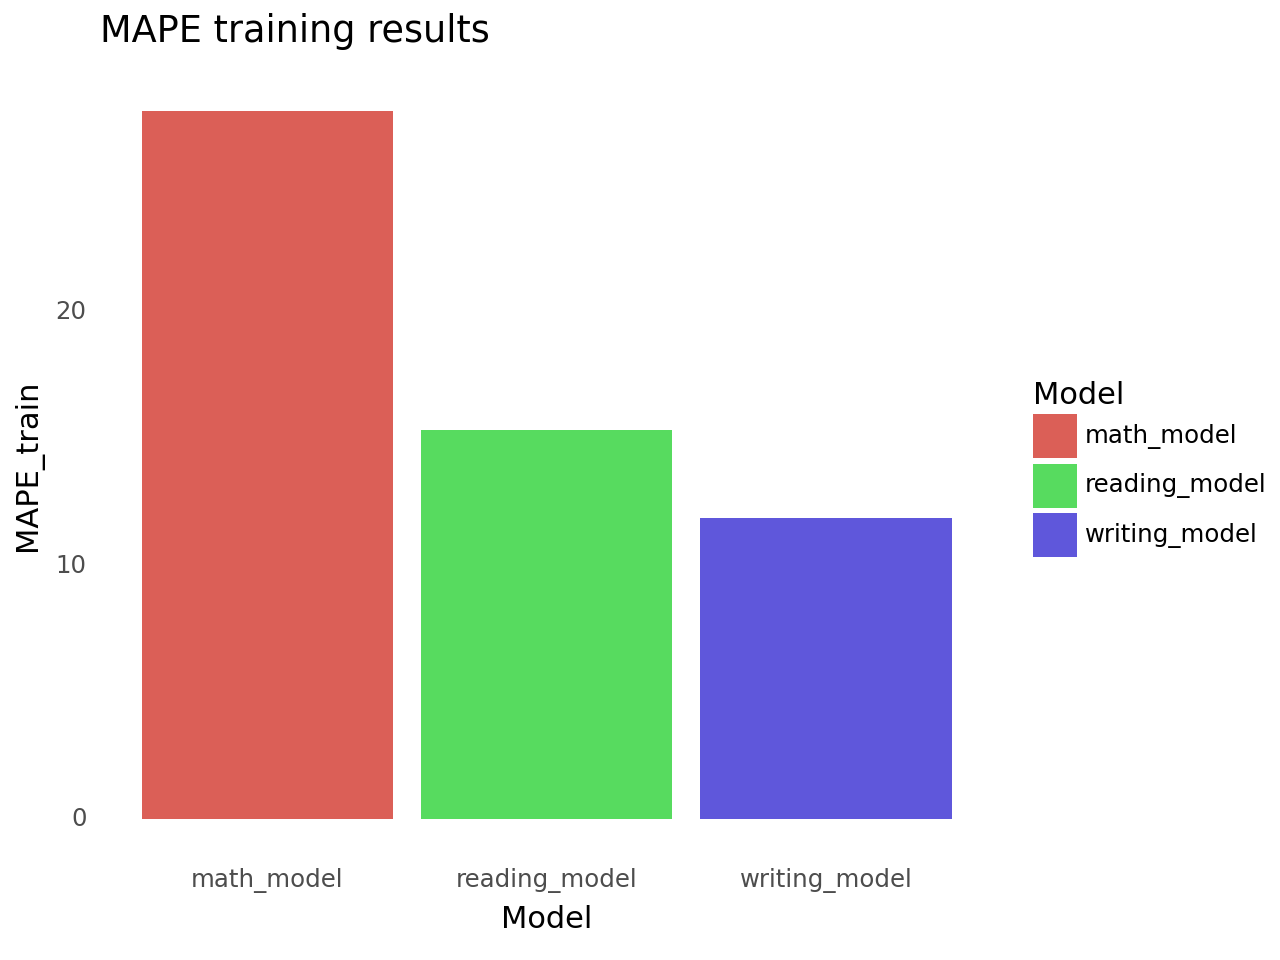

<Figure Size: (640 x 480)>

In [ ]:
#QUESTION 1: ggplot Bar Chart
(ggplot(measures_df, aes( x = "Model", y = "MAPE_train", fill = "Model")) + labs(title = "MAPE training results")
+ geom_bar(stat = "identity") + theme_minimal() + theme(panel_grid_major_x = element_blank(),
  panel_grid_major_y = element_blank(), panel_grid_minor_y = element_blank()))

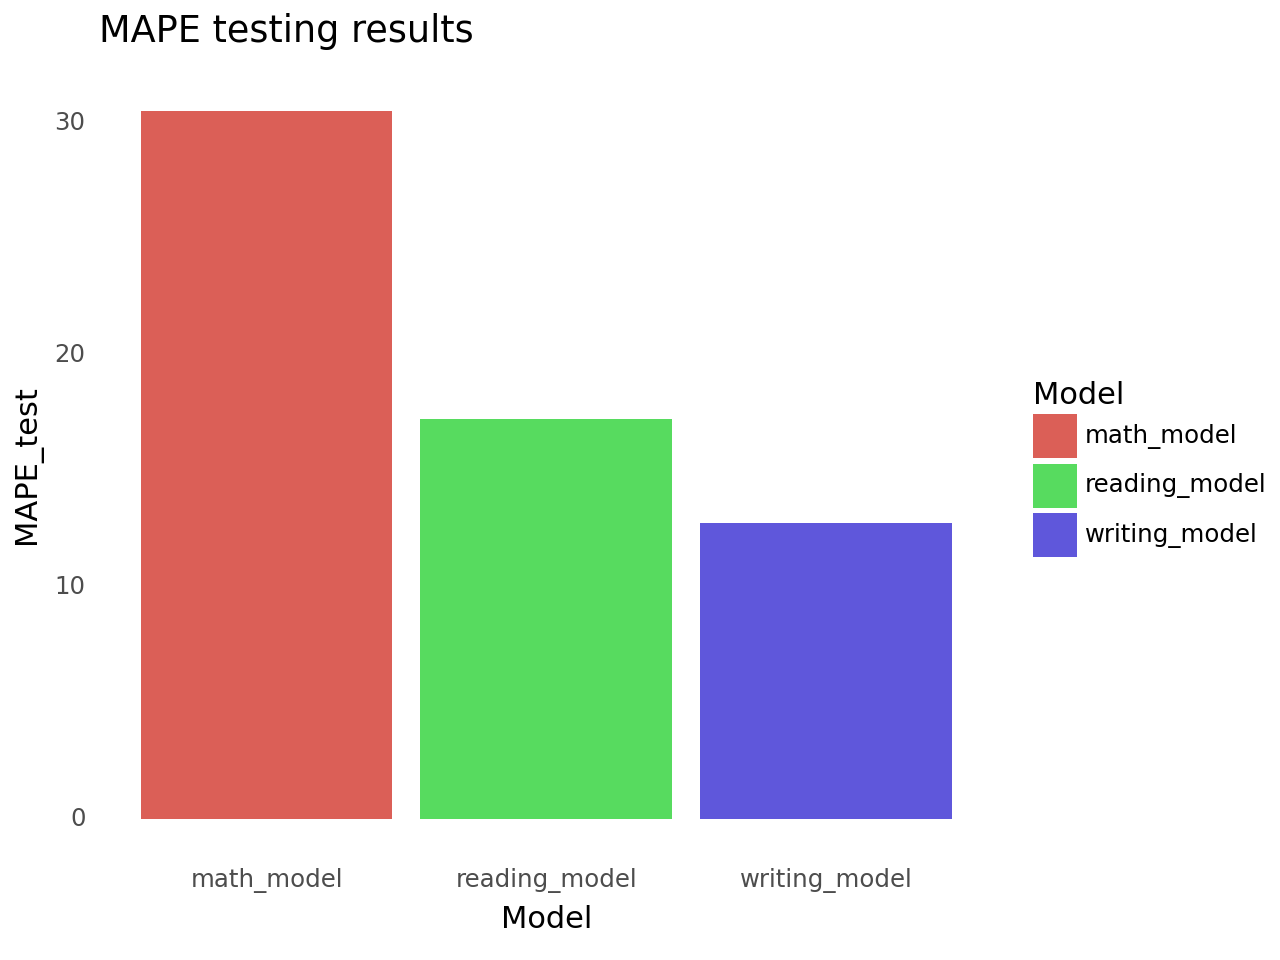

<Figure Size: (640 x 480)>

In [ ]:
#QUESTION 1: ggplot Bar Chart
(ggplot(measures_df, aes( x = "Model", y = "MAPE_test", fill = "Model")) + labs(title = "MAPE testing results")
+ geom_bar(stat = "identity") + theme_minimal() + theme(panel_grid_major_x = element_blank(),
  panel_grid_major_y = element_blank(), panel_grid_minor_y = element_blank()))

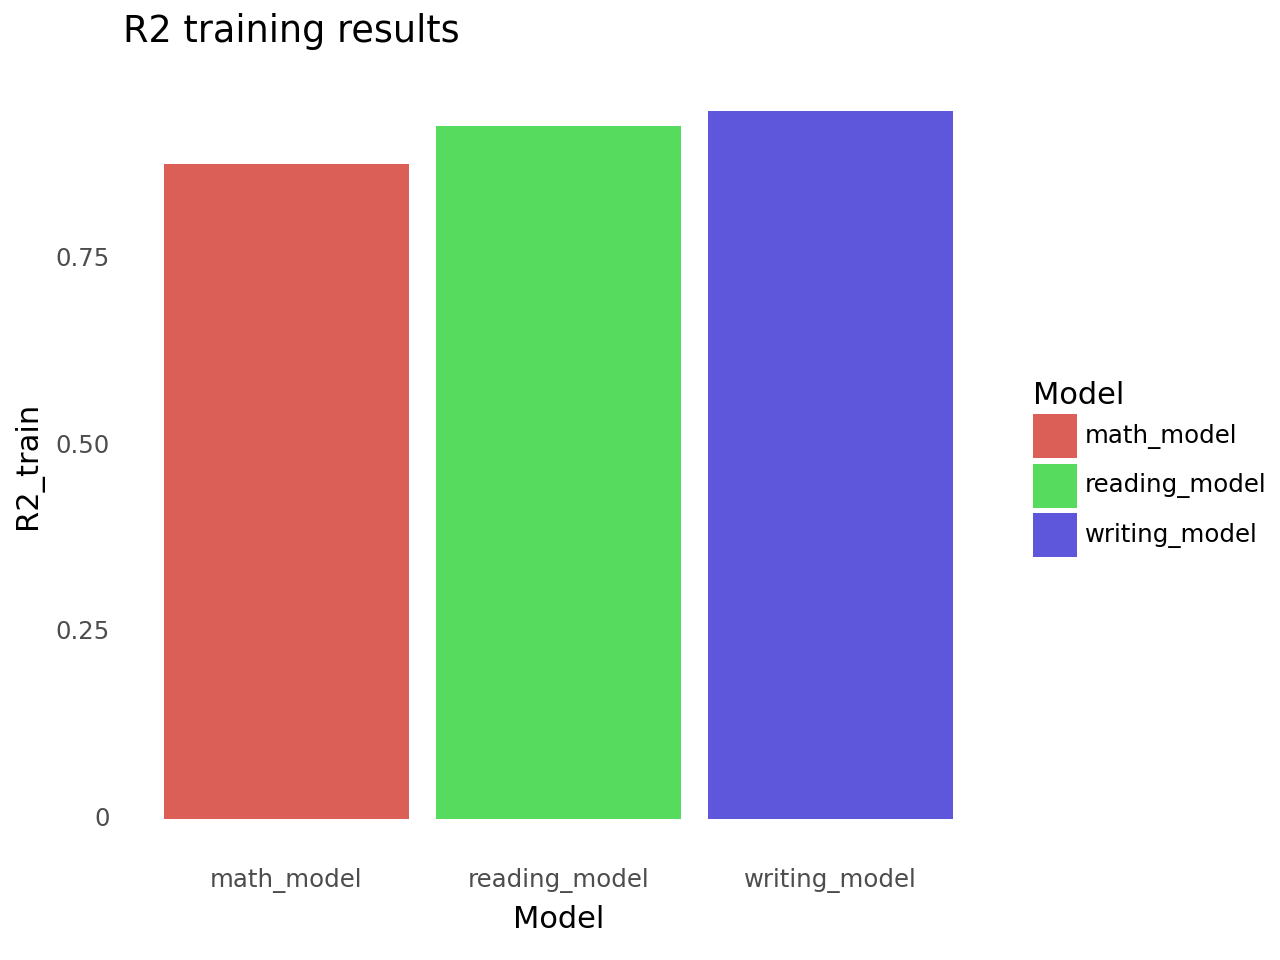

<Figure Size: (640 x 480)>

In [ ]:
#QUESTION 1: ggplot Bar Chart
(ggplot(measures_df, aes( x = "Model", y = "R2_train", fill = "Model")) + labs(title = "R2 training results")
+ geom_bar(stat = "identity") + theme_minimal() + theme(panel_grid_major_x = element_blank(),
  panel_grid_major_y = element_blank(), panel_grid_minor_y = element_blank()))

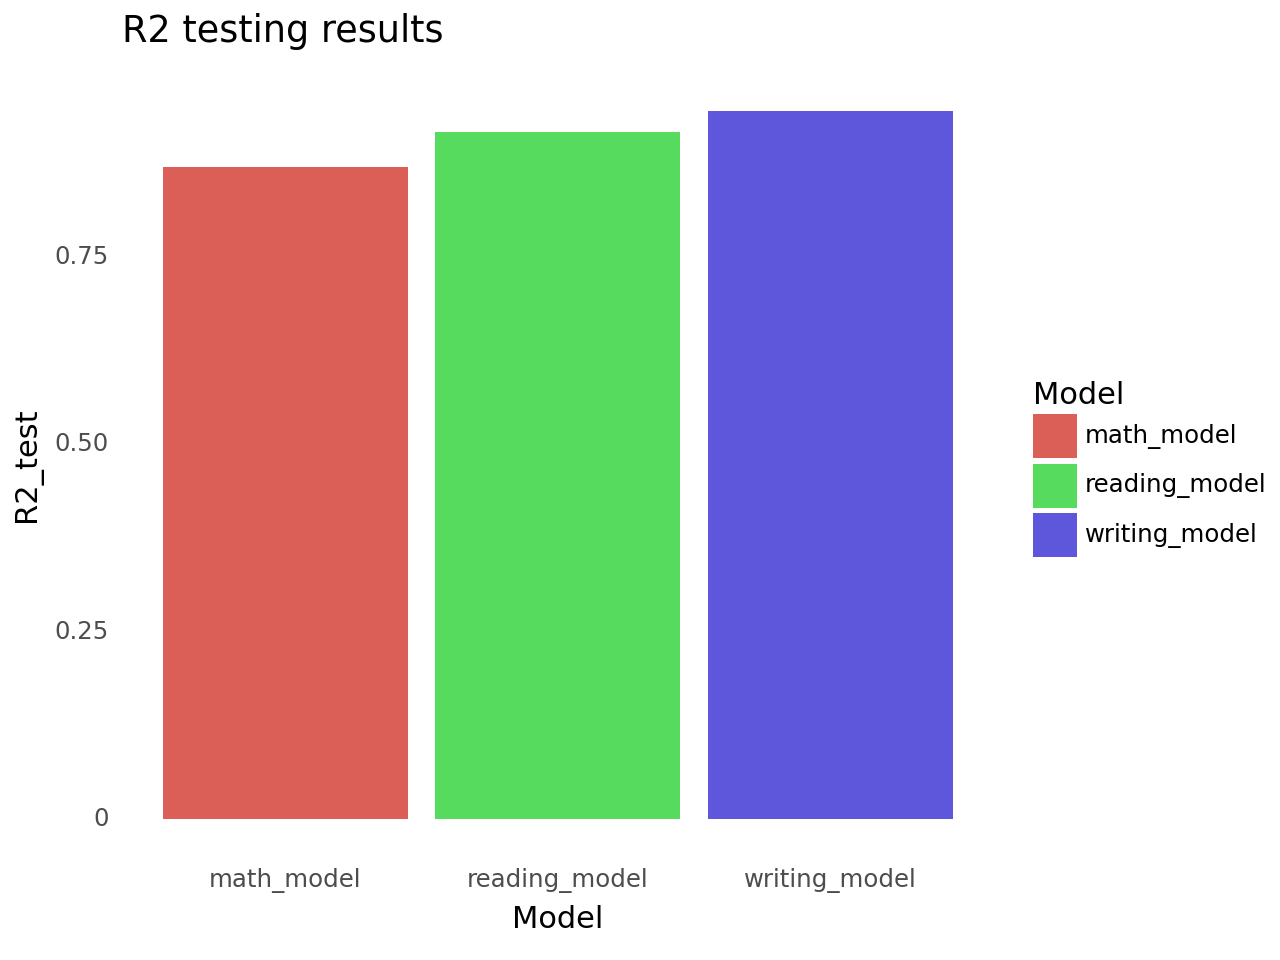

<Figure Size: (640 x 480)>

In [ ]:
#QUESTION 1: ggplot Bar Chart
(ggplot(measures_df, aes( x = "Model", y = "R2_test", fill = "Model")) + labs(title = "R2 testing results")
+ geom_bar(stat = "identity") + theme_minimal() + theme(panel_grid_major_x = element_blank(),
  panel_grid_major_y = element_blank(), panel_grid_minor_y = element_blank()))

In [ ]:
#QUESTION #2: reading score polynomial regression model

# set up X and y
predictors = ["gender","race", "parental_level_of_education", "lunch", "test_preparation_course", "math_score", "writing score"]
contin = ["math_score", "writing score"]
categorical_variables = ["gender","race", "parental_level_of_education", "lunch", "test_preparation_course"]
X4 = student_data[predictors]
y4 = student_data["reading_score"]

# z score and make dummys
z = make_column_transformer((StandardScaler(), contin),
 (OneHotEncoder(), categorical_variables),
    remainder = "passthrough")

lr = LinearRegression()

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4, test_size = 0.2)

#Polynomial model
pipe = Pipeline([("zscore", z),
                ("poly", PolynomialFeatures(degree = 2)),
                ("linearregression", lr)])

# fit
pipe.fit(X_train4,y_train4)

# predict
y_pred_train4 = pipe.predict(X_train4)
y_pred_test4 = pipe.predict(X_test4)

# calculations
print("train variables")
print("MSE : ", mean_squared_error(y_train4,y_pred_train4))
print("MAE : ", mean_absolute_error(y_train4,y_pred_train4))
print("MAPE: ", mean_squared_error(y_train4,y_pred_train4))
print("R2  : ", r2_score(y_train4,y_pred_train4))
print("test variables")
print("MSE : ", mean_squared_error(y_test4,y_pred_test4))
print("MAE : ", mean_absolute_error(y_test4,y_pred_test4))
print("MAPE: ", mean_squared_error(y_test4,y_pred_test4))
print("R2  : ", r2_score(y_test4,y_pred_test4))

train variables
MSE :  13.214366498589516
MAE :  2.895350341796875
MAPE:  13.214366498589516
R2  :  0.9380814867465378
test variables
MSE :  19.214233741760253
MAE :  3.556923828125
MAPE:  19.214233741760253
R2  :  0.9089415964088894


In [ ]:
#QUESTION 2: Creating a data table for all the accurarcy measures for training/testing for both the linear and polynomial model
Linear_training = [(mean_squared_error(y_train2,y_pred_train2)), (mean_absolute_error(y_train2,y_pred_train2)), (mean_squared_error(y_train2,y_pred_train2)), (r2_score(y_train2,y_pred_train2))]

Linear_testing = [(mean_squared_error(y_test2,y_pred_test2)), (mean_absolute_error(y_test2,y_pred_test2)), (mean_squared_error(y_test2,y_pred_test2)), (r2_score(y_test2,y_pred_test2))]

Polynomial_training = [(mean_squared_error(y_train4,y_pred_train4)), (mean_absolute_error(y_train4,y_pred_train4)), (mean_squared_error(y_train4,y_pred_train4)), (r2_score(y_train4,y_pred_train4))]

Polynomial_testing = [(mean_squared_error(y_test4,y_pred_test4)), (mean_absolute_error(y_test4,y_pred_test4)), (mean_squared_error(y_test4,y_pred_test4)), (r2_score(y_test4,y_pred_test4))]


Measures = ["MSE", "MAE", "MAPE", "R2"]

# Create a DataFrame
measures_df = pd.DataFrame({'Measures': Measures, 'Linearing train': Linear_training, 'Linearing test': Linear_testing, 'Polynomial train': Polynomial_training, 'Polynomial test': Polynomial_testing})
# Create a data table
measures_df.head()

,Measures,Linearing train,Linearing test,Polynomial train,Polynomial test
0,MSE,15.343092,17.241830,13.214366,19.214234
1,MAE,3.185923,3.291806,2.895350,3.556924
2,MAPE,15.343092,17.241830,13.214366,19.214234
3,R2,0.928385,0.916350,0.938081,0.908942


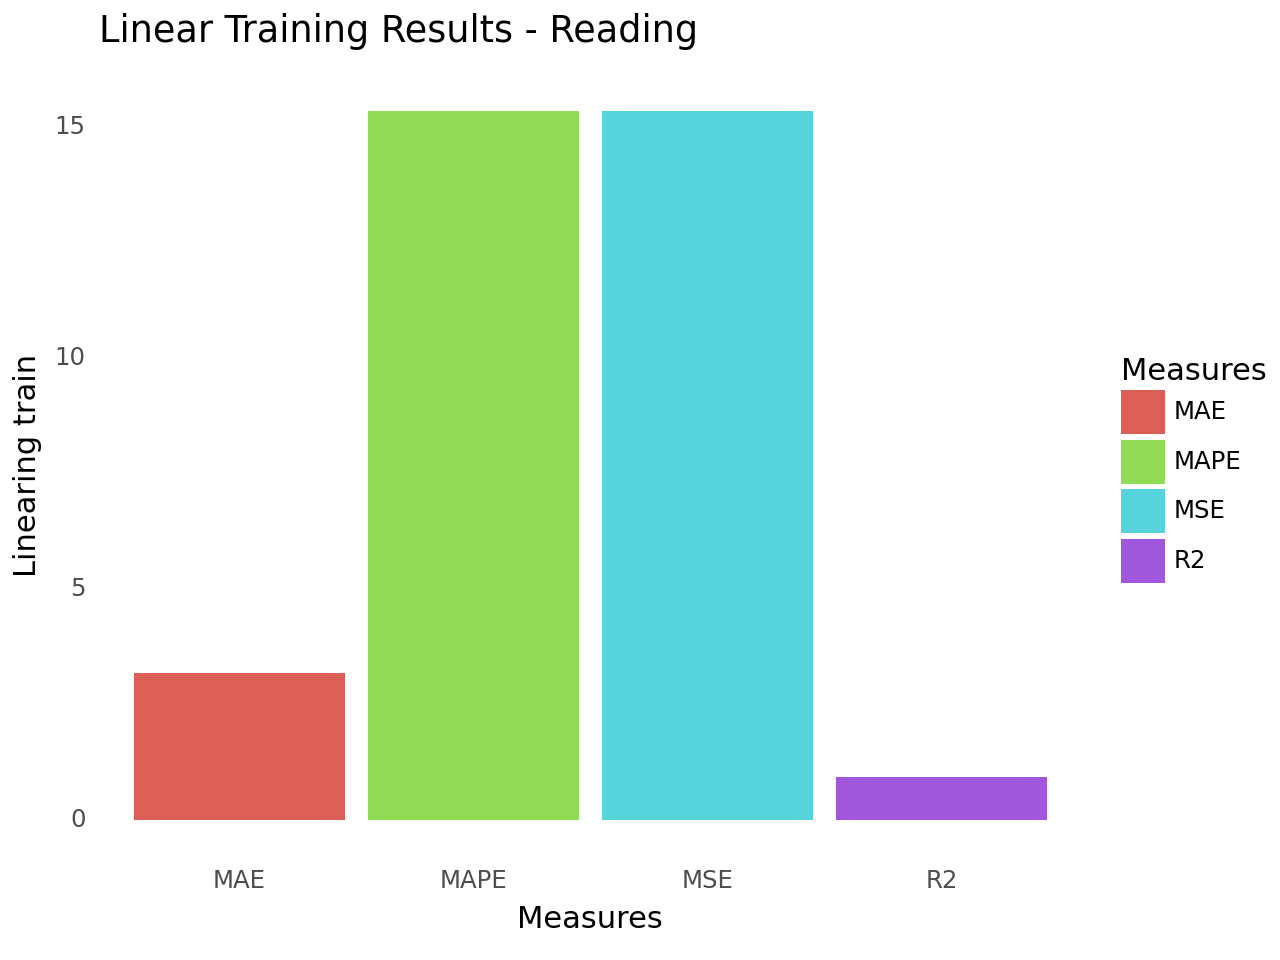

<Figure Size: (640 x 480)>

In [ ]:
#QUESTION 2: Creating the box plots for visual comparision
(ggplot(measures_df, aes( x = "Measures", y = "Linearing train", fill = "Measures")) + labs(title = "Linear Training Results - Reading")
+ geom_bar(stat = "identity") + theme_minimal() + theme(panel_grid_major_x = element_blank(),
  panel_grid_major_y = element_blank(), panel_grid_minor_y = element_blank()))

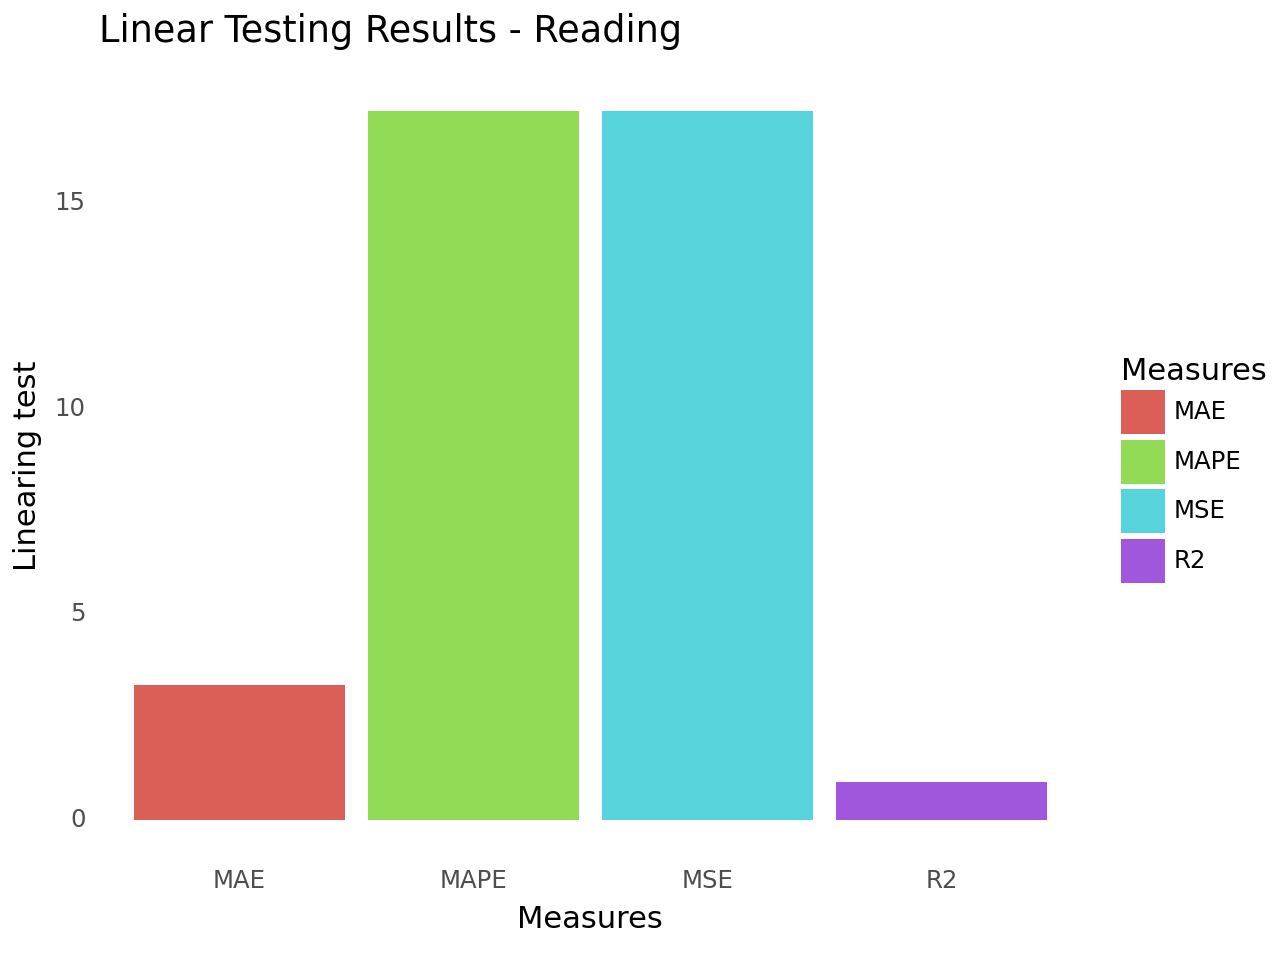

<Figure Size: (640 x 480)>

In [ ]:
#QUESTION 2: Creating the box plots for visual comparision
(ggplot(measures_df, aes( x = "Measures", y = "Linearing test", fill = "Measures")) + labs(title = "Linear Testing Results - Reading")
+ geom_bar(stat = "identity") + theme_minimal() + theme(panel_grid_major_x = element_blank(),
  panel_grid_major_y = element_blank(), panel_grid_minor_y = element_blank()))

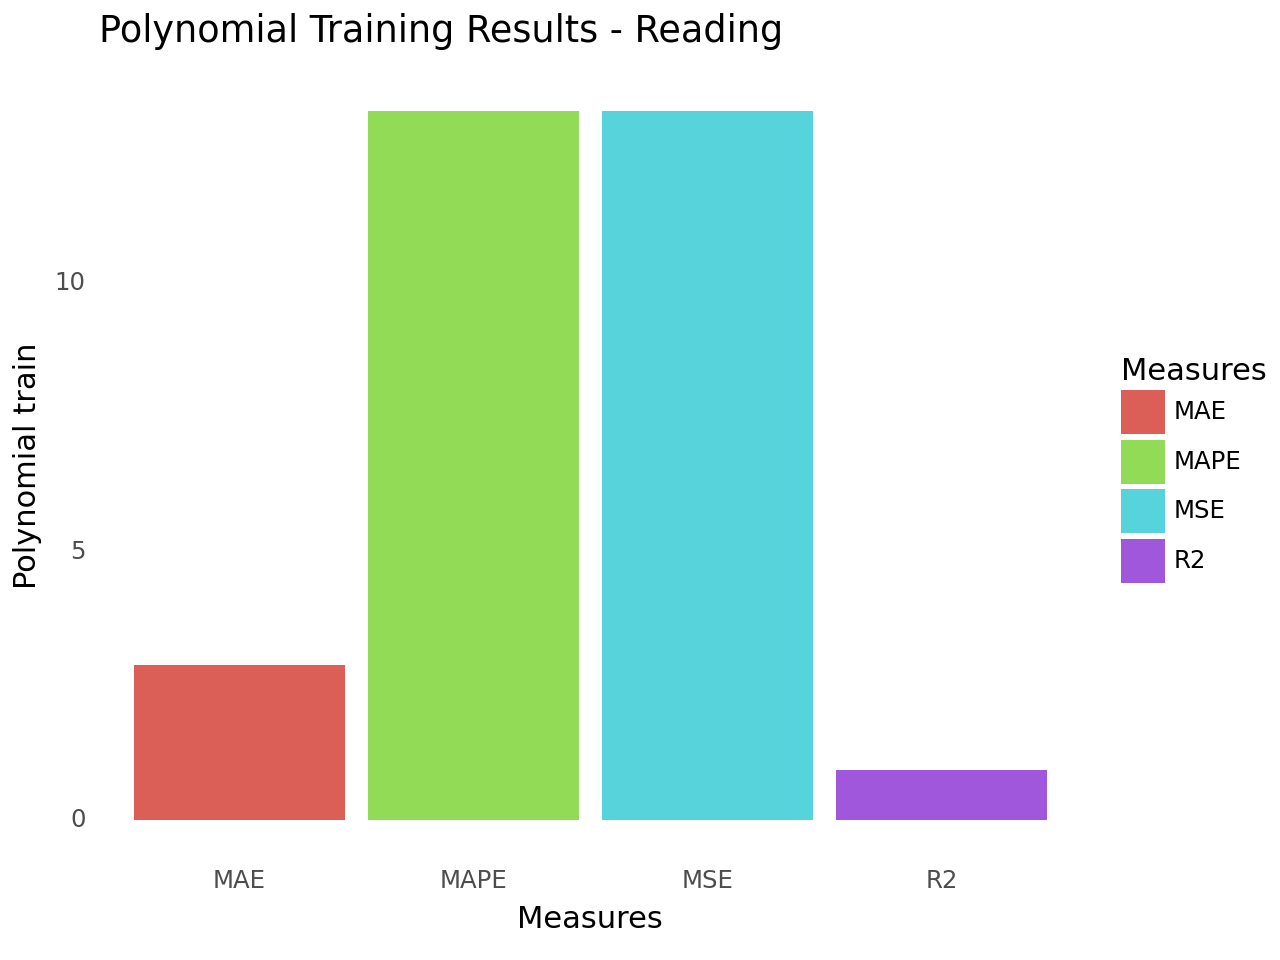

<Figure Size: (640 x 480)>

In [ ]:
#QUESTION 2: Creating the box plots for visual comparision
(ggplot(measures_df, aes( x = "Measures", y = "Polynomial train", fill = "Measures")) + labs(title = "Polynomial Training Results - Reading")
+ geom_bar(stat = "identity") + theme_minimal() + theme(panel_grid_major_x = element_blank(),
  panel_grid_major_y = element_blank(), panel_grid_minor_y = element_blank()))

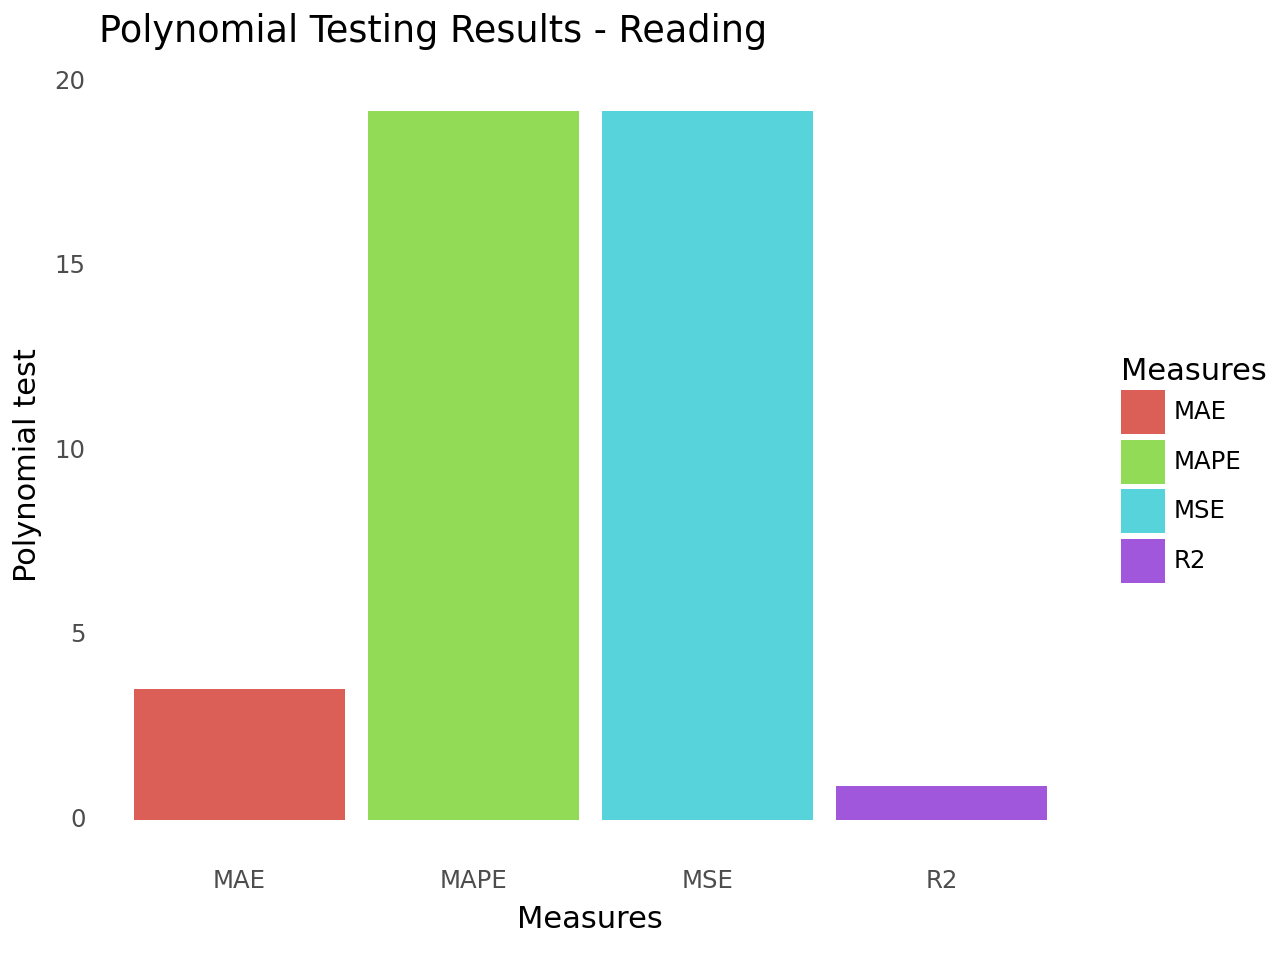

<Figure Size: (640 x 480)>

In [ ]:
#QUESTION 2: Creating the box plots for visual comparision
(ggplot(measures_df, aes( x = "Measures", y = "Polynomial test", fill = "Measures")) + labs(title = "Polynomial Testing Results - Reading")
+ geom_bar(stat = "identity") + theme_minimal() + theme(panel_grid_major_x = element_blank(),
  panel_grid_major_y = element_blank(), panel_grid_minor_y = element_blank()))

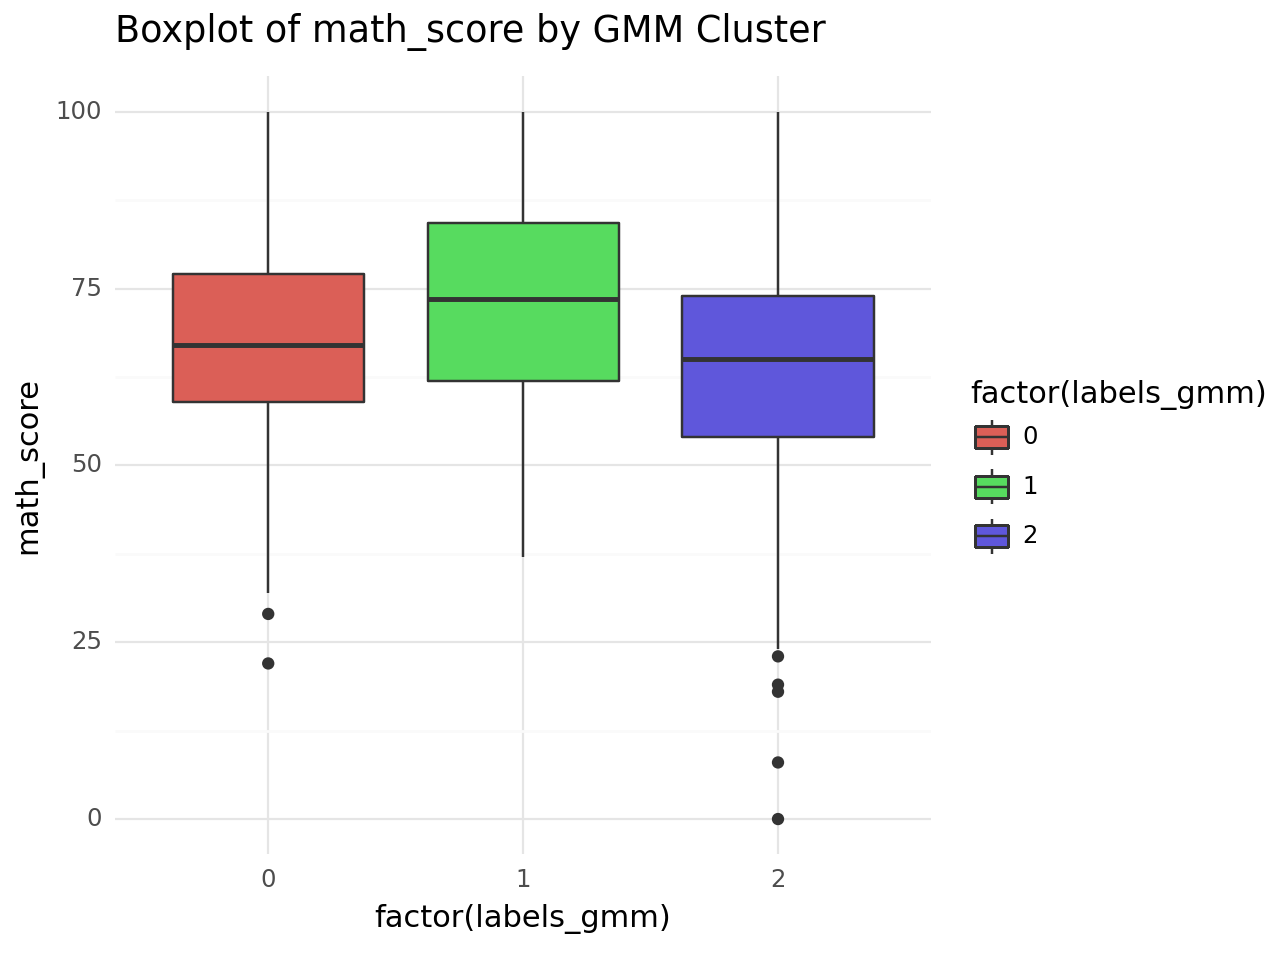

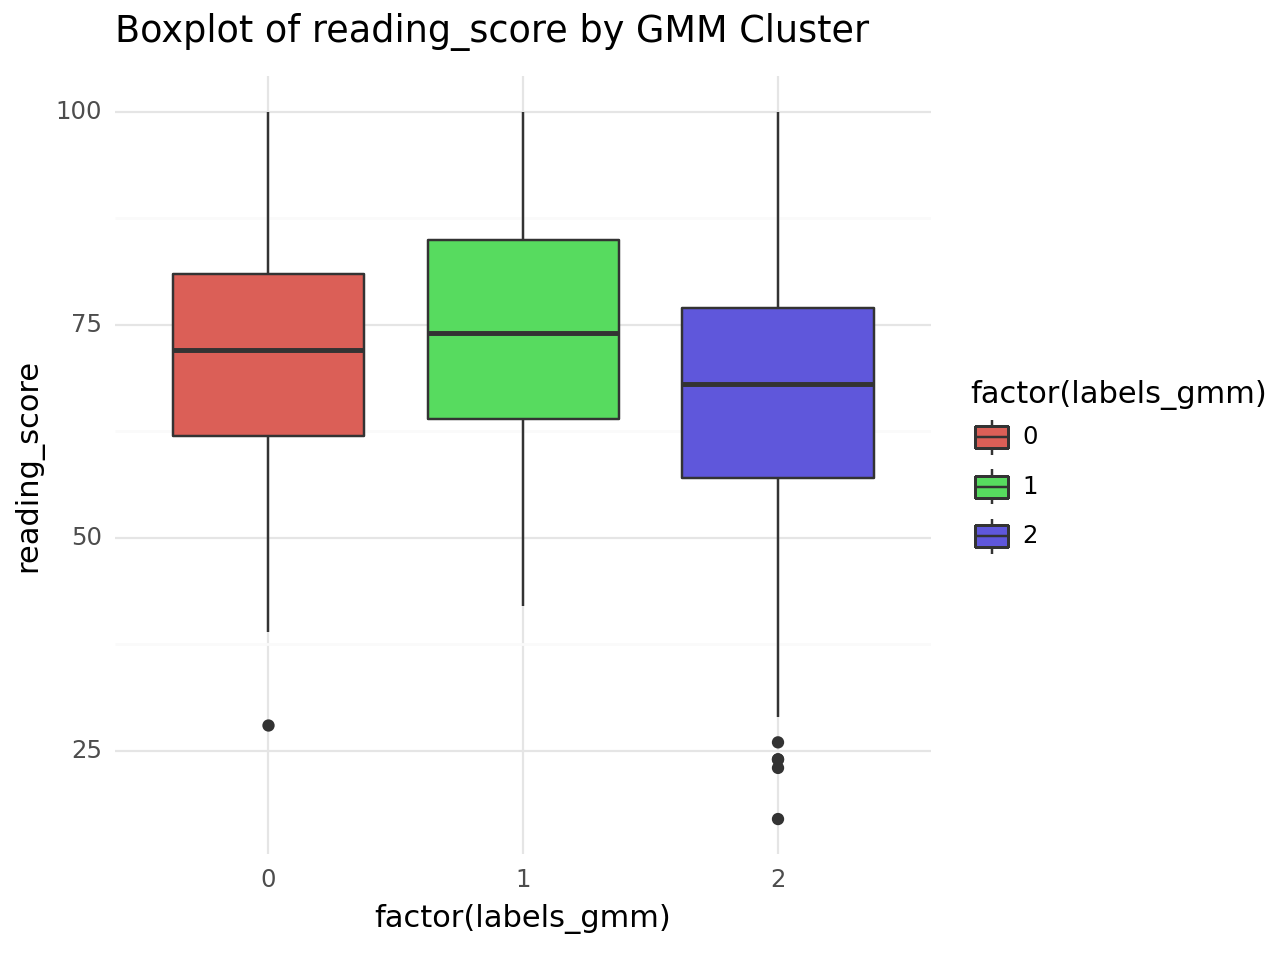

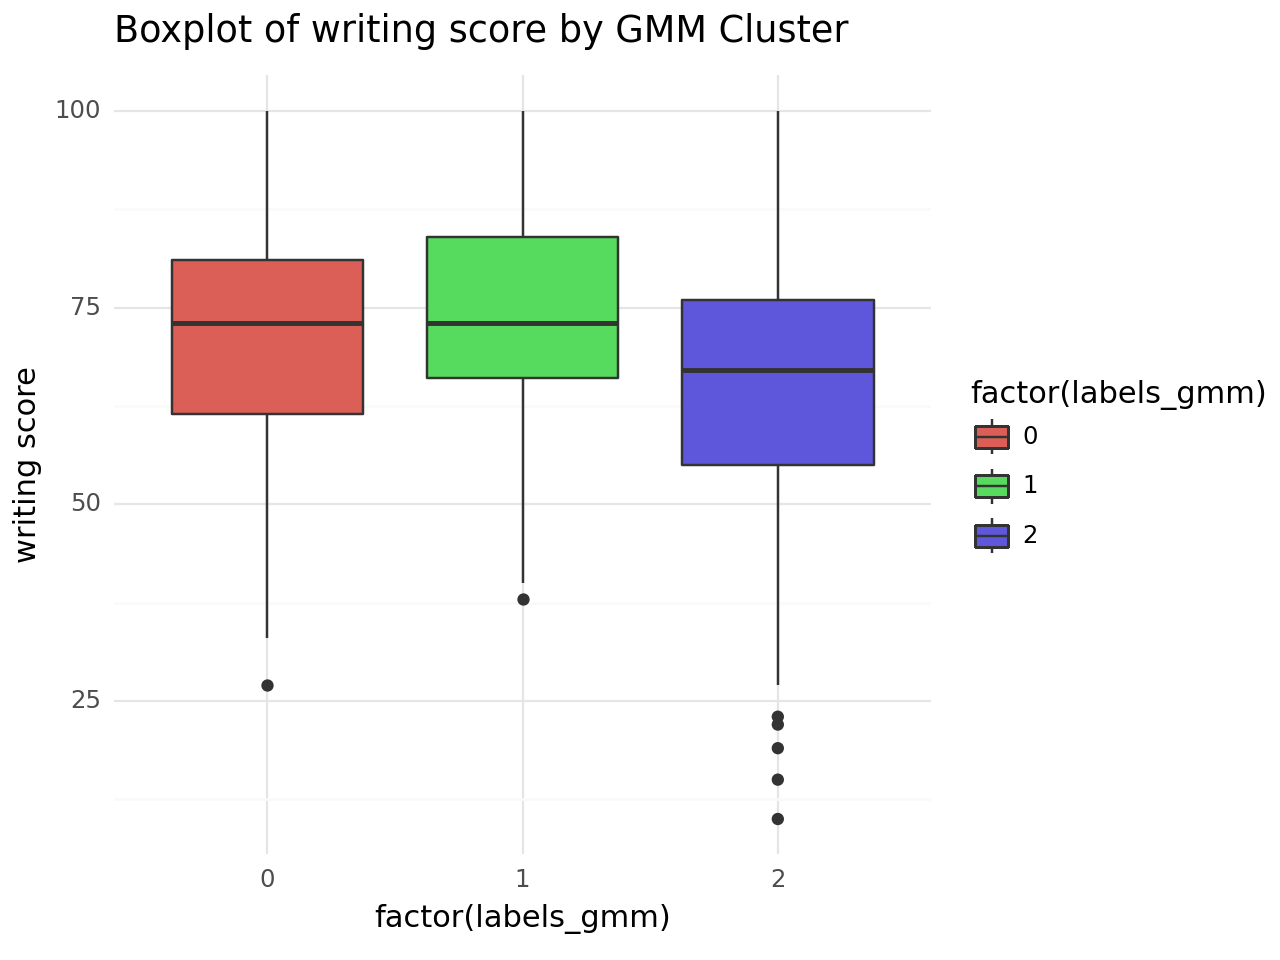


            math_score  reading_score  writing score
labels_gmm                                          
0            67.288703      71.129707      71.384937
1            73.141892      74.466216      73.858108
2            63.918434      67.125612      65.353997


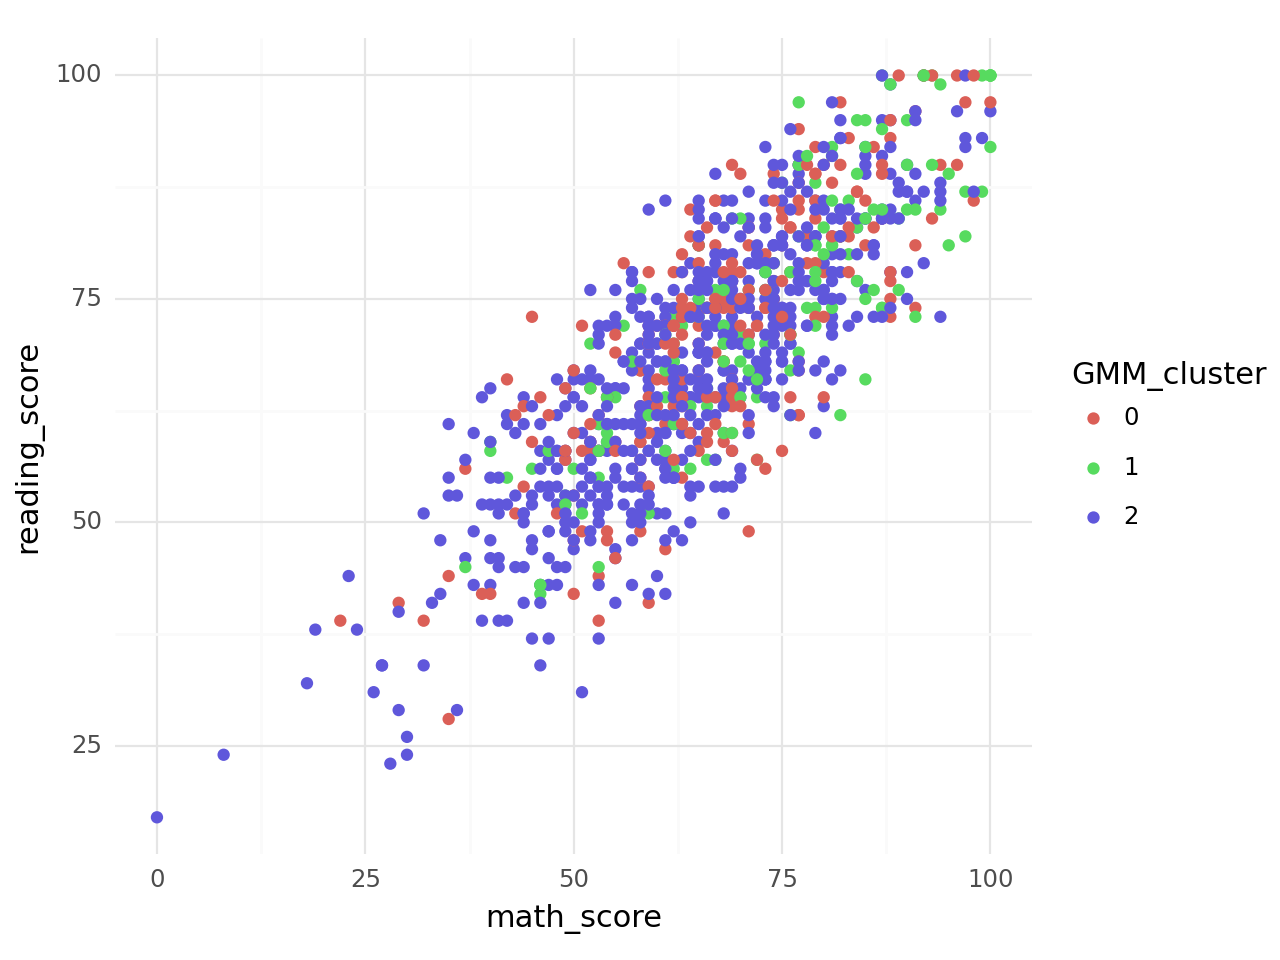

<Figure Size: (640 x 480)>

In [ ]:
#GMM --> Question 3
contin = ['math_score', 'reading_score', 'writing score']
categorical_variables = ['gender', 'race', 'parental_level_of_education', 'lunch', 'test_preparation_course']

gmm = GaussianMixture(n_components=3, random_state=0)

preprocessor = make_column_transformer(
    (StandardScaler(), contin),
    (OneHotEncoder(), categorical_variables),
    remainder="passthrough"
)

pipe = Pipeline([
    ("pre", preprocessor),
    ("gmm", gmm)
])

# Fit and transform the data
labels_gmm = pipe.fit_predict(df)

# Add the cluster labels to your DataFrame
df['labels_gmm'] = labels_gmm

for variable in contin:
    plot = (
        ggplot(df, aes(x='factor(labels_gmm)', y=variable, fill='factor(labels_gmm)')) +
        geom_boxplot() +
        labs(title=f'Boxplot of {variable} by GMM Cluster') +
        theme_minimal()
    )
    print(plot)

# Create a groupby table showing the mean of all variables
grouped_mean = df.groupby('labels_gmm').mean()
print(grouped_mean)


# Scatter plot for the first two features in contin_var
feature1 = contin[0]
feature2 = contin[1]

# Create ggplot
(ggplot(df, aes(x=feature1, y=feature2, color='factor(labels_gmm)')) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name="GMM_cluster")
)

        PC1       PC2  Cluster
0 -0.749980  1.033857        0
1 -2.053013  1.318746        1
2 -2.877355 -0.147684        1
3  2.379771 -0.470283        2
4 -1.073993  0.993257        1


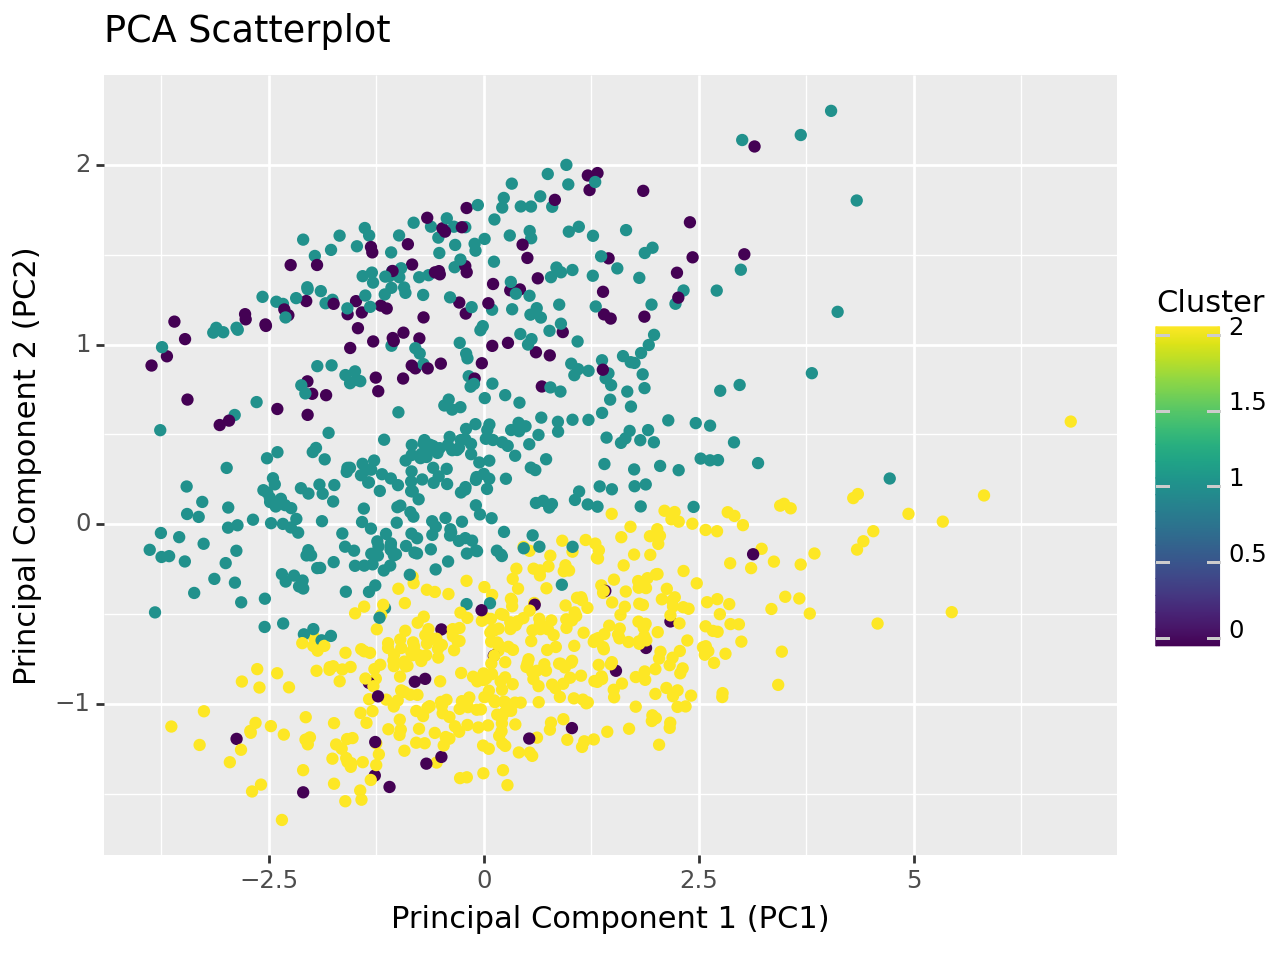

In [ ]:
#PCA --> Question 3
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_transformed)

# Convert the numpy array to a DataFrame
pca_df = pd.DataFrame({'PC1': pca_result[:, 0], 'PC2': pca_result[:, 1], 'Cluster': labels_gmm})

print(pca_df.head())

# Scatterplot
scatter = ggplot(pca_df, aes(x='PC1', y='PC2', color='Cluster')) + \
    geom_point() + \
    labs(x="Principal Component 1 (PC1)", y="Principal Component 2 (PC2)", title="PCA Scatterplot")

print(scatter)

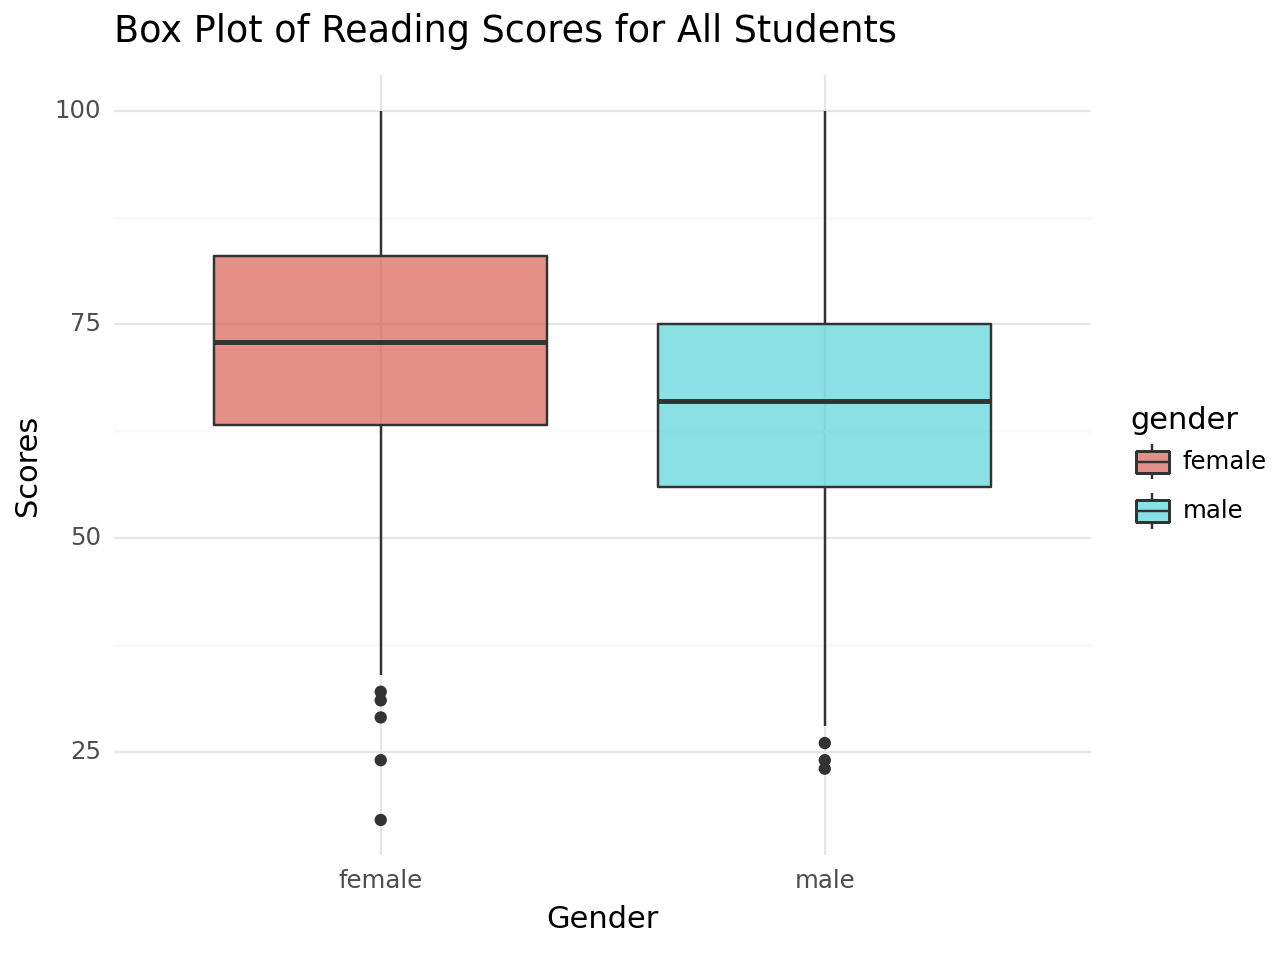

In [ ]:
#QUESTION 4
boxplot_rw = (
    ggplot(df, aes(x='gender', y='reading_score', fill='gender'))
    + geom_boxplot(alpha=0.7)
    + theme_minimal()
    + labs(x='Gender', y='Scores', title='Box Plot of Reading Scores for All Students')
)

# Display the box plot for reading scores
print(boxplot_rw)

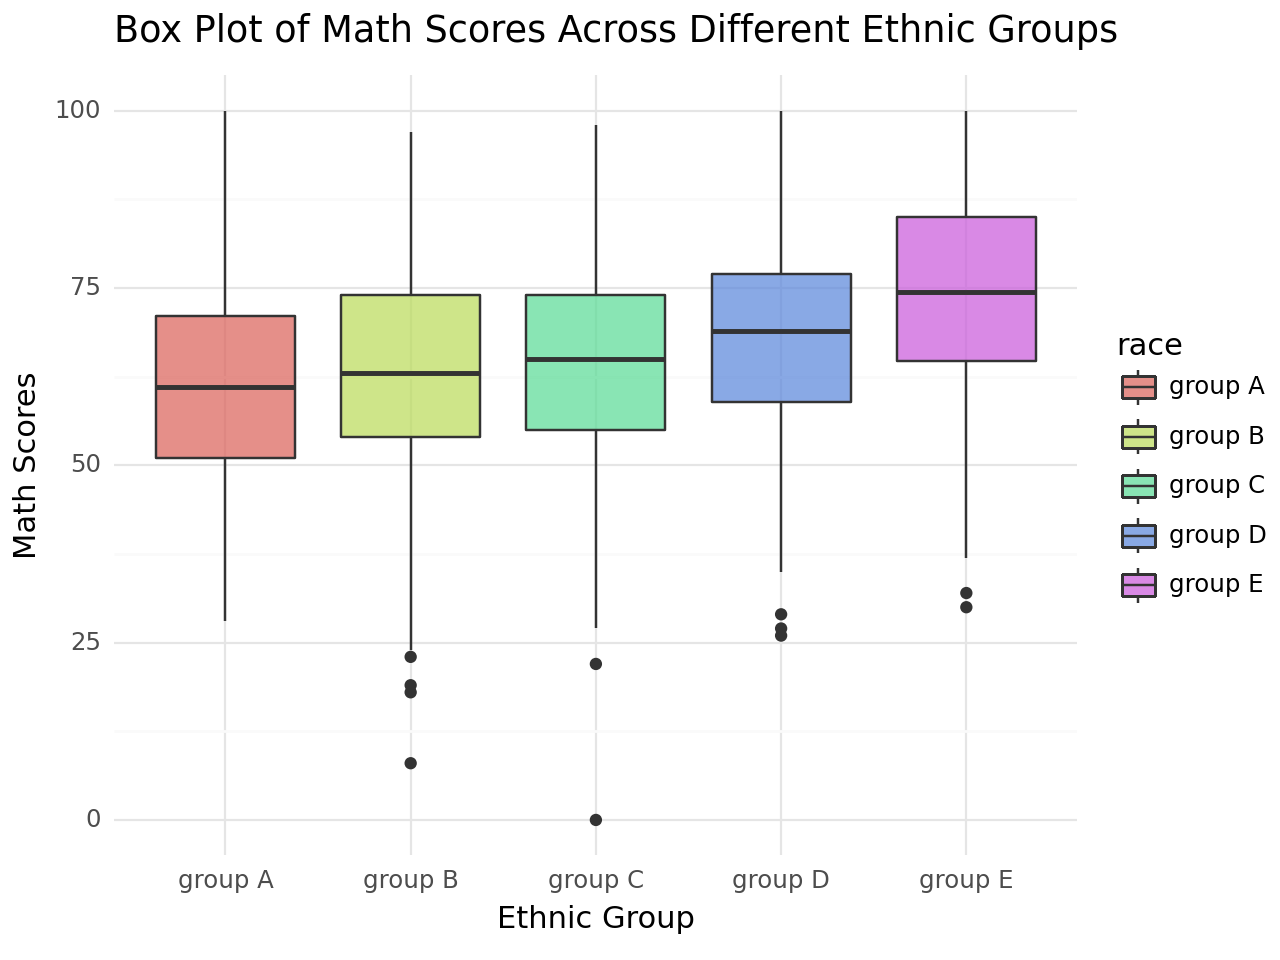

In [ ]:
#QUESTION 4
ethnicity = (
    ggplot(df, aes(x='race', y='math_score', fill='race'))
    + geom_boxplot(alpha=0.7)
    + theme_minimal()
    + labs(x='Ethnic Group', y='Math Scores', title='Box Plot of Math Scores Across Different Ethnic Groups')
)

print(ethnicity)

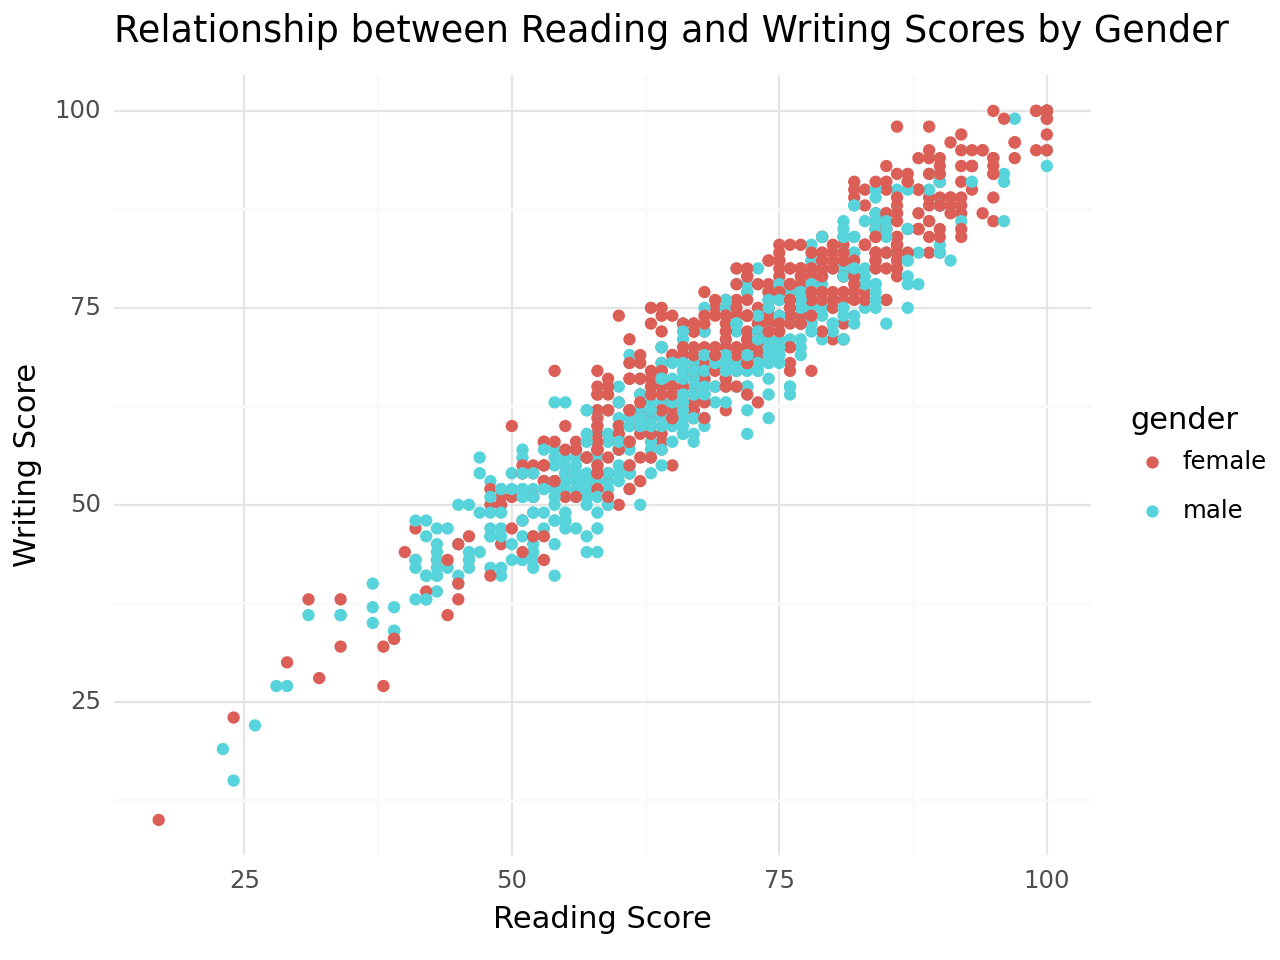

In [ ]:
#QUESTION 4
scatterplot_gender = (
    ggplot(df, aes(x='reading_score', y='writing score', color='gender'))
    + geom_point()
    + theme_minimal()
    + labs(x='Reading Score', y='Writing Score', title='Relationship between Reading and Writing Scores by Gender')
)

# Display the scatterplot
print(scatterplot_gender)